# Capstone Project

Presented by: Mustafa Furkan Kolanci

Date: 11/24/2021

Instructor: Angelica Spratley

github link: https://github.com/mfurkankolanci/CapstoneProject

## Overview

## Business Understanding

As a data scientist, I was approached by a stakeholder, Youtube's maintance team. They have noticed that many popular music videos have several spam comments under them. Spam comments are undesired comments that are not related to the music video. They would like detect these comments in order to improve user experience. Therefore, they have asked me to generate a model that performs spam detection analysis in order to categorize comments as spam and not spam.

## Data Understanding

The dataset is from the year 2013 and includes 1,956 Youtube comments. The comments are taken from music videos of PSY, Katy Perry, LMFAO, Eminem and Shakira. There are  five columns, the first column includes the  comment id, the second column is the author of comment, third column is the date of comment,  fourth column is the comment text and fifth column is whether the comment is spam (1) or not (0). 

## Data Preparation and Text Preprocessing

Let's start by importing modules necessary for analysis and reading in the data.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# df_psy = pd.read_csv('Data/Youtube01-Psy.csv')
# df_kp = pd.read_csv('Data/Youtube02-KatyPerry.csv')
# df_lmfao = pd.read_csv('Data/Youtube03-LMFAO.csv')
# df_eminem = pd.read_csv('Data/Youtube04-Eminem.csv')
# df_shakira = pd.read_csv('Data/Youtube05-Shakira.csv')
df = pd.concat(map(pd.read_csv, ['Data/Youtube01-Psy.csv','Data/Youtube02-KatyPerry.csv',
                                 'Data/Youtube03-LMFAO.csv', 'Data/Youtube04-Eminem.csv',
                                 'Data/Youtube05-Shakira.csv']), ignore_index=True)
df

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
1951,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
1952,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
1953,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
1954,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0


In [3]:
df['DATE'] = pd.to_datetime(df['DATE'])
df["HOUR"] = df['DATE'].dt.hour
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,HOUR
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07 06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,6.0
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07 12:37:15,Hey guys check out my new channel and our firs...,1,12.0
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08 17:34:21,just for test I have to say murdev.com,1,17.0
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09 08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,8.0
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10 16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,16.0


In [4]:
temp = df[['CLASS','HOUR']]
hourly_temp = temp.groupby(temp['HOUR']).sum()
hourly_temp

,CLASS
HOUR,
0.0,30
1.0,38
2.0,28
3.0,38
4.0,17
5.0,25
6.0,21
7.0,14
8.0,16


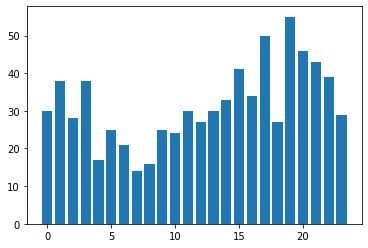

In [5]:
import matplotlib.pyplot as plt
plt.bar(hourly_temp.index,hourly_temp.CLASS)
plt.show()

In [6]:
df['CLASS'].value_counts(normalize=True)

1    0.513804
0    0.486196
Name: CLASS, dtype: float64

In [7]:
df.drop(['COMMENT_ID','AUTHOR','DATE'],axis=1, inplace=True)

In [8]:
import html
df['CONTENT'] = df['CONTENT'].apply(html.unescape)

In [9]:
import re
htmlregex = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')

def cleanhtml(comment):
    html_filtered_comment = re.sub(htmlregex, '', comment)
    return html_filtered_comment

In [10]:
df['CONTENT'] = df['CONTENT'].apply(cleanhtml)

In [11]:
df['CONTENT'] = df['CONTENT'].str.replace('\ufeff','')

In [12]:
urlregex = re.compile(r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))""")

def detecturl(comment):
    url_filtered_comment = re.sub(urlregex, 'url', comment)
    return url_filtered_comment

In [13]:
df['CONTENT'] = df['CONTENT'].apply(detecturl)

In [14]:
re.sub(r'[^A-Za-z0-9 ]+', '', df['CONTENT'][1908])

'Please Check my channel out I subscribe back'

In [15]:
alphanumericregex = re.compile(r'[^A-Za-z0-9 ]+')
def onlyalphanumeric(comment):
    alphanumeric_filtered_comment = re.sub(alphanumericregex, '', comment)
    return alphanumeric_filtered_comment

In [16]:
df['CONTENT'] = df['CONTENT'].apply(onlyalphanumeric)

Next, let's perform some feature engineering on the tweets. In the following cell, let's initiate the tokenizaton, stopword removal and lemmatization of the tweets. 

Tokenization will split each tweets into its respective words so that each word be analyzed by itself in the model. 

Stopword removal is necessary as stopwords are words that provide little to no sentiment value to the tweets. 

Lemmatization is needed as it allows to group words that are from the same root so that words that have the same meaning are considered the same. This way, the model is not hurt by needlessly increasing dimensionality.

In [17]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

stopwords_list = stopwords.words('english')

lemmatizer = WordNetLemmatizer()

def lemmatize_and_tokenize(text):
    tokens = word_tokenize(text)
    return [lemmatizer.lemmatize(token) for token in tokens]

Next, let's perform a train-test split.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['CONTENT'], df['CLASS'], random_state=42) ## TRAIN TEST SPLIT

Now that the dataset is cleaned, lemmatized and tokenized, it can now be converted into a vector format. In order to do so, TF-IDF vectorization will be used. This method is based on the idea that rare words are more valuable for prediction. The method utilizes two metrics:
* TF (term frequency) refers to the ratio of number of times a word appear in the document to the total number of words in the document. 
* IDF (Inverse Document Frequency) refers to the logged ratio of number of documents to the number of documents including the word.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=10, ngram_range=(1,2), stop_words=stopwords_list, tokenizer=lemmatize_and_tokenize)

X_train_vectorized = tfidf.fit_transform(X_train)

X_train_df = pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())

In [20]:
# transforming the test data
X_test_vectorized = tfidf.transform(X_test)
X_test_df = pd.DataFrame.sparse.from_spmatrix(X_test_vectorized, columns=tfidf.get_feature_names())

## MODELING

### Baseline Model: Logistic Regression

We decided to select a logistic regression with no hyperparameter tuning as the baseline classification model. Logistic regression was chosen as it is a simple classification algorithm and computationally efficient.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix, accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train_df, y_train)
y_test_pred = logreg.predict(X_test_df)

Let's use cross-validation to observe how the baseline model does with unseen training data.

In [22]:
# "np.mean" takes the average of 5 cross-validation scores
np.mean(cross_val_score(logreg,X_train_df, y_train,cv=5, scoring = 'accuracy'))

0.9100229853033364

Let's look at the confusion matrix to see how the baseline model did on the test set.

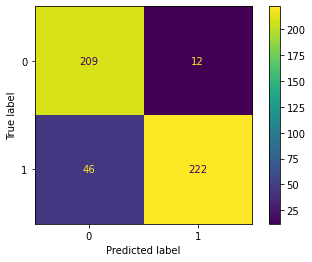

In [23]:
plot_confusion_matrix(logreg,X_test_df,y_test);

Finally, let's calculate the accuracy score of the baseline model on the test set.

In [24]:
accuracy_score(y_test,y_test_pred)

0.8813905930470347

# Conclusion

# Future Research